In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Vader

In [39]:
df = pd.read_csv('./vadersResult.csv')
df.head(5)

,Tweet Id,neg,neu,pos,compound,sentiment,Datetime,Text,Username,Permalink,...,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts,Word Tokenized,Stopword Removed,pos_tags,Word Stemmed
0,1617156291046133761,0.000,0.814,0.186,0.4939,Positive,2023-01-22 13:44:39+00:00,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,"[User(username='AlexandrovnaIng', id=282705900...",[],0,"['alexandrovnaing', 'prohibition', 'of', 'chat...","['alexandrovnaing', 'prohibition', 'chatgpt', ...","[('alexandrovnaing', 'VBG'), ('prohibition', '...","['alexandrovna', 'prohibit', 'chatgpt', 'ad', ..."
1,1617156332297256961,0.000,1.000,0.000,0.0000,Neutral,2023-01-22 13:44:49+00:00,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,...,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/agadmator/status/161715501...,NaN,[],0,"['bow', 'down', 'to', 'chatgpt', '\U0001fae1',...","['bow', 'chatgpt', 'tcoentszi2aq9']","[('bow', 'RB'), ('down', 'RB'), ('to', 'TO'), ...","['bow', 'chatgpt', 'tcoentszi2aq9']"
2,1617156389217894400,0.000,1.000,0.000,0.0000,Neutral,2023-01-22 13:45:03+00:00,ChatGPT runs 10K Nvidia training GPUs with pot...,FierceElectron,https://twitter.com/FierceElectron/status/1617...,...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,[],0,"['chatgpt', 'runs', '10k', 'nvidia', 'training...","['chatgpt', 'runs', '10k', 'nvidia', 'training...","[('chatgpt', 'NN'), ('runs', 'VBZ'), ('10k', '...","['chatgpt', 'run', '10k', 'nvidia', 'train', '..."
3,1617156393898745858,0.067,0.933,0.000,-0.2500,Negative,2023-01-22 13:45:04+00:00,@SWENGDAD There is repetitive work in every jo...,xlr8harder,https://twitter.com/xlr8harder/status/16171563...,...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,"[User(username='SWENGDAD', id=1460452950875193...",[],0,"['swengdad', 'there', 'is', 'repetitive', 'wor...","['swengdad', 'repetitive', 'work', 'every', 'j...","[('swengdad', 'NN'), ('there', 'EX'), ('is', '...","['swengdad', 'repetit', 'work', 'everi', 'job'..."
4,1617156404137295878,0.000,0.846,0.154,0.2500,Positive,2023-01-22 13:45:06+00:00,I created a fictional jewelry brand using Chat...,Kosuke_dazo,https://twitter.com/Kosuke_dazo/status/1617156...,...,"<a href=""http://twitter.com/download/iphone"" r...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,"['#ChatGPT', '#midjourney']",2,"['i', 'created', 'a', 'fictional', 'jewelry', ...","['created', 'fictional', 'jewelry', 'brand', '...","[('i', 'RB'), ('created', 'VBD'), ('a', 'DT'),...","['creat', 'fiction', 'jewelri', 'brand', 'use'..."


In [36]:
df = df[df.Language =="en"]
df_encoded=df.drop(["neg","neu","pos","compound","hashtag","Username","Permalink","User","ConversationId","Source","Text","Language","Datetime","Tweet Id","Word Tokenized","Stopword Removed","pos_tags","Word Stemmed"],axis=1)
df_encoded['Media'] = df_encoded['Media'].notnull().astype(int)
df_encoded['MentionedUsers'] = df_encoded['MentionedUsers'].notnull().astype(int)
df_encoded['QuotedTweet'] = df_encoded['QuotedTweet'].notnull().astype(int)
df_encoded['CountLinks'] = df_encoded['CountLinks'].notnull().astype(int)
df_encoded['Outlinks'] = df_encoded['Outlinks'].notnull().astype(int)
df_encoded.head(5)

,sentiment,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,Media,QuotedTweet,MentionedUsers,hastag_counts
0,Positive,0,0,1,0,5,0,0,0,1,0
1,Neutral,1,1,0,0,2,0,0,1,0,0
2,Neutral,1,1,0,0,0,0,0,0,0,0
3,Negative,0,0,1,0,3,0,0,0,1,0
4,Positive,1,1,0,1,2,1,1,0,0,2


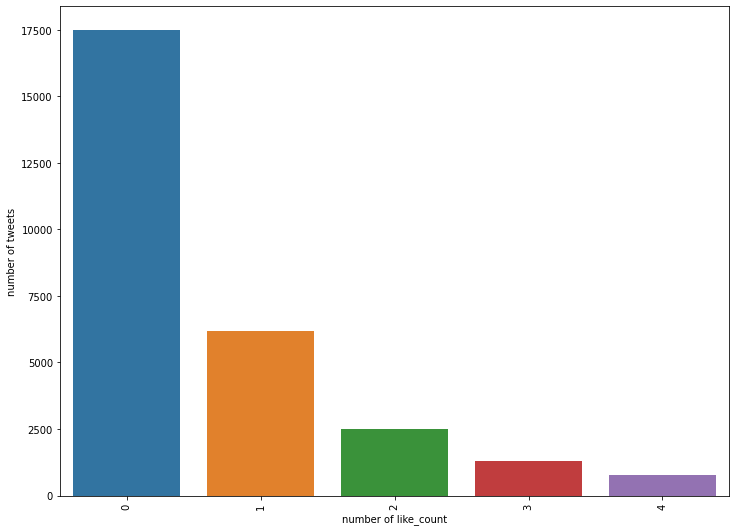

In [40]:
plt.figure(figsize=(12,9))
ax=sns.countplot(data=df, x='LikeCount', order=df_encoded["LikeCount"].value_counts().index[:5])
ax.set_xlabel("number of like_count")
ax.set_ylabel("number of tweets")
plt.xticks(rotation=90)
plt.savefig('fig2-3.png')
plt.show()

In [41]:
# Perform one-hot encoding on the "Language" attribute
encoded_data = pd.get_dummies(df_encoded['sentiment'], prefix='sentiment')

# Concatenate the encoded data with the original dataset
dataset_encoded = pd.concat([df_encoded, encoded_data], axis=1)

# Drop the original "Language" attribute
dataset_encoded.drop('sentiment', axis=1, inplace=True)
df_encoded=dataset_encoded
df_encoded.head(7)

,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,Media,QuotedTweet,MentionedUsers,hastag_counts,sentiment_Negative,sentiment_Neutral,sentiment_Positive
0,0,0,1,0,5,0,0,0,1,0,0,0,1
1,1,1,0,0,2,0,0,1,0,0,0,1,0
2,1,1,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,3,0,0,0,1,0,1,0,0
4,1,1,0,1,2,1,1,0,0,2,0,0,1
5,0,0,0,0,0,0,1,0,0,1,0,0,1
6,0,0,0,0,0,1,0,0,0,0,0,0,1


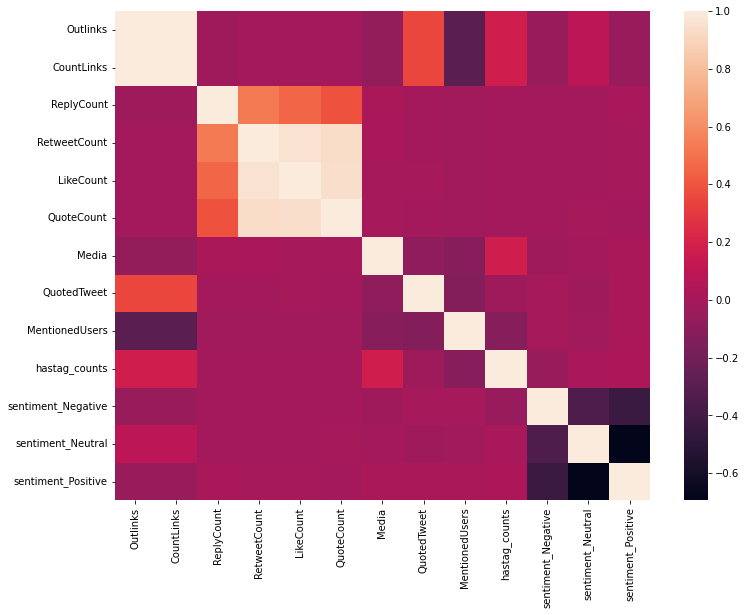

In [42]:
import seaborn as sns
plt.figure(figsize=(12,9))
corr = df_encoded.corr()
sns.heatmap(corr)
plt.savefig('fig2-1.png')
plt.show()

In [43]:
def categorize_likecount(likecount):
    if likecount == 0:
        return 0
    else:
        return 1
dataset_encoded['LikeCount'] = dataset_encoded['LikeCount'].apply(categorize_likecount)

In [44]:
dataset_encoded['LikeCount'].unique()

array([1, 0], dtype=int64)

c:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


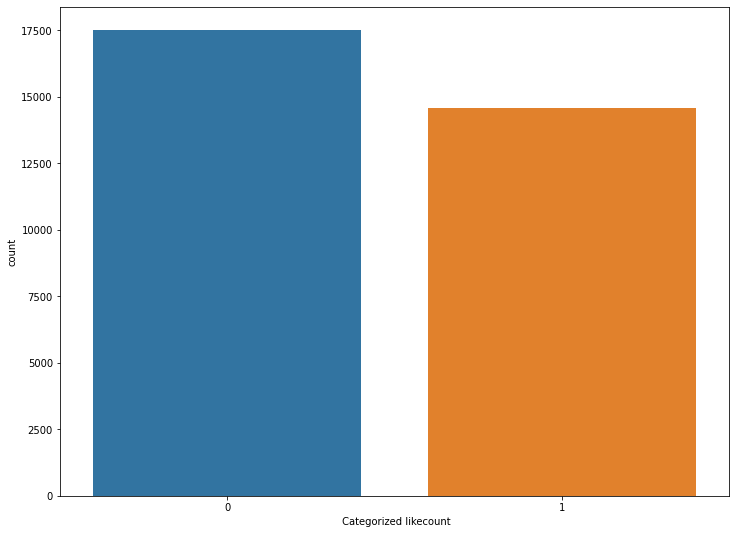

In [45]:
plt.figure(figsize=(12,9))
ax=sns.countplot(dataset_encoded['LikeCount'])
ax.set_xlabel(" Categorized likecount")
plt.savefig('fig2-2.png')
plt.show()

In [46]:
x=dataset_encoded.drop('LikeCount', axis=1)
y=dataset_encoded['LikeCount']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection


models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Dec Tree', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF',RandomForestClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
 kfold = model_selection.KFold(n_splits=10)
 cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f " % (name, cv_results.mean()*100)
 print(msg)

LR: 70.941033 
KNN: 66.195952 
Dec Tree: 69.653464 
NB: 62.439558 
SVM: 66.835190 
RF: 70.021337 


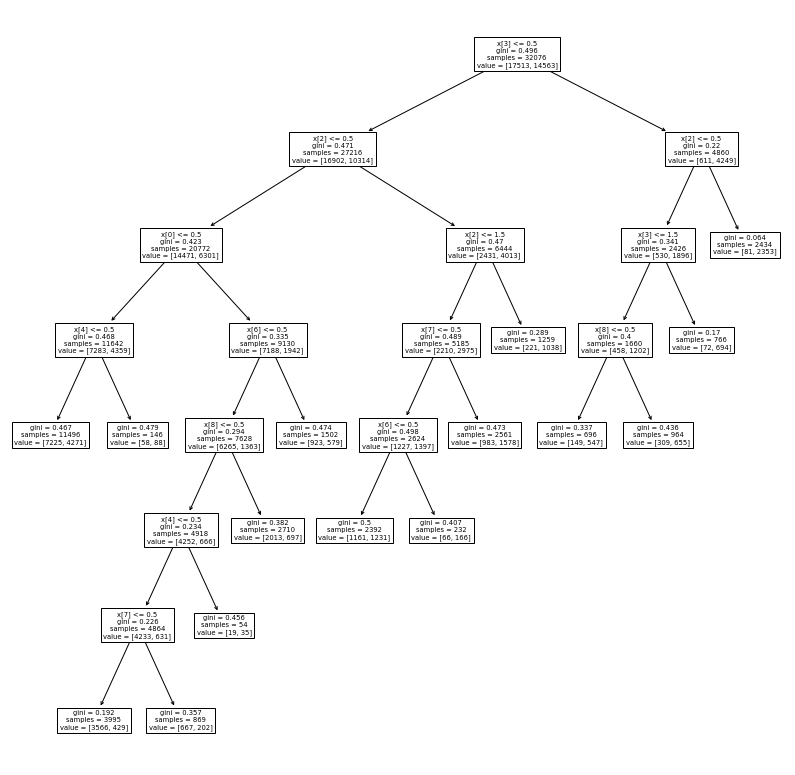

In [48]:
plt.figure(figsize=(14,14))
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_leaf_nodes=15)
clf.fit(x,y)
tree.plot_tree(clf)
plt.savefig('fig2-4.png')
plt.show()

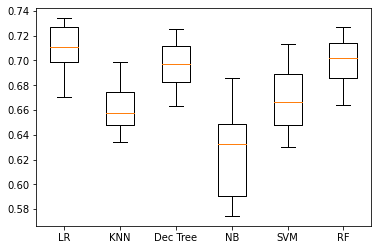

In [57]:
# boxplot algorithm comparison
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.savefig('fig2-6 Vader.png')
plt.show()

In [12]:
import xgboost as xgb
from sklearn.metrics import classification_report

model = xgb.XGBClassifier(objective='multi:softmax', num_class=2)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.68      0.85      0.76      3475
           1       0.75      0.54      0.63      2941

    accuracy                           0.71      6416
   macro avg       0.72      0.69      0.69      6416
weighted avg       0.71      0.71      0.70      6416



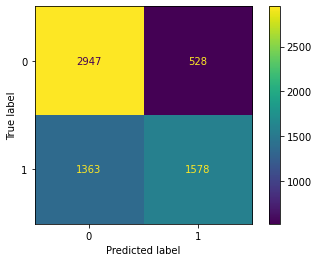

In [13]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

## Without semiment feature

In [58]:
x=dataset_encoded.drop(['LikeCount',"sentiment_Negative","sentiment_Neutral","sentiment_Positive"], axis=1)
y=dataset_encoded['LikeCount']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [59]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Dec Tree', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF',RandomForestClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
 kfold = model_selection.KFold(n_splits=10)
 cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f " % (name, cv_results.mean()*100)
 print(msg)

LR: 70.959742 
KNN: 64.658901 
Dec Tree: 70.329985 
NB: 62.439558 
SVM: 66.860128 
RF: 70.439099 


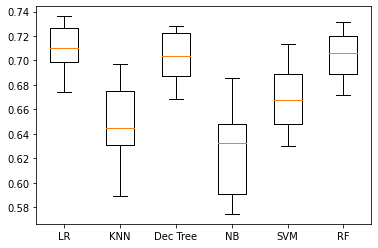

In [60]:
# boxplot algorithm comparison
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.savefig('fig2-6.png')
plt.show()

In [17]:
import xgboost as xgb
from sklearn.metrics import classification_report

model = xgb.XGBClassifier(objective='multi:softmax', num_class=3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.83      0.76      3475
           1       0.74      0.56      0.64      2941

    accuracy                           0.71      6416
   macro avg       0.72      0.70      0.70      6416
weighted avg       0.71      0.71      0.70      6416



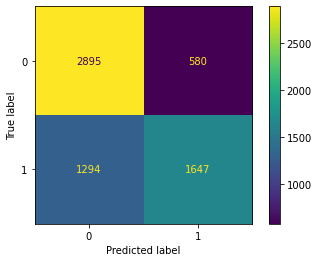

In [18]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

<AxesSubplot: >

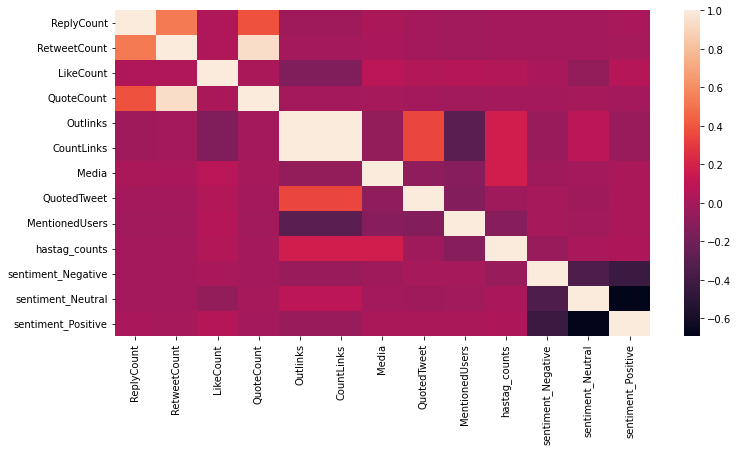

In [65]:
import seaborn as sns
corr = df_encoded.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr)

# Roberta

In [61]:
df = pd.read_csv('./robertaResult.csv')
df.head(5)

,Tweet Id,roberta_neg,roberta_neu,roberta_pos,sentiment,Datetime,Text,Username,Permalink,User,...,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts,day,Word Tokenized,Stopword Removed,pos_tags,Word Stemmed
0,1617156291046133761,0.008655,0.560821,0.430524,Neutral,2023-01-22 13:44:39+00:00,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,...,NaN,NaN,"[User(username='AlexandrovnaIng', id=282705900...",[],0,22,"['alexandrovnaing', 'prohibition', 'of', 'chat...","['alexandrovnaing', 'prohibition', 'chatgpt', ...","[('alexandrovnaing', 'VBG'), ('prohibition', '...","['alexandrovna', 'prohibit', 'chatgpt', 'ad', ..."
1,1617156332297256961,0.048818,0.895561,0.055621,Neutral,2023-01-22 13:44:49+00:00,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,...,NaN,https://twitter.com/agadmator/status/161715501...,NaN,[],0,22,"['bow', 'down', 'to', 'chatgpt', '\U0001fae1',...","['bow', 'chatgpt', 'tcoentszi2aq9']","[('bow', 'RB'), ('down', 'RB'), ('to', 'TO'), ...","['bow', 'chatgpt', 'tcoentszi2aq9']"
2,1617156389217894400,0.004709,0.617854,0.377437,Neutral,2023-01-22 13:45:03+00:00,ChatGPT runs 10K Nvidia training GPUs with pot...,FierceElectron,https://twitter.com/FierceElectron/status/1617...,https://twitter.com/FierceElectron,...,NaN,NaN,NaN,[],0,22,"['chatgpt', 'runs', '10k', 'nvidia', 'training...","['chatgpt', 'runs', '10k', 'nvidia', 'training...","[('chatgpt', 'NN'), ('runs', 'VBZ'), ('10k', '...","['chatgpt', 'run', '10k', 'nvidia', 'train', '..."
3,1617156393898745858,0.014811,0.331287,0.653902,Positive,2023-01-22 13:45:04+00:00,@SWENGDAD There is repetitive work in every jo...,xlr8harder,https://twitter.com/xlr8harder/status/16171563...,https://twitter.com/xlr8harder,...,NaN,NaN,"[User(username='SWENGDAD', id=1460452950875193...",[],0,22,"['swengdad', 'there', 'is', 'repetitive', 'wor...","['swengdad', 'repetitive', 'work', 'every', 'j...","[('swengdad', 'NN'), ('there', 'EX'), ('is', '...","['swengdad', 'repetit', 'work', 'everi', 'job'..."
4,1617156404137295878,0.026949,0.885862,0.087189,Neutral,2023-01-22 13:45:06+00:00,I created a fictional jewelry brand using Chat...,Kosuke_dazo,https://twitter.com/Kosuke_dazo/status/1617156...,https://twitter.com/Kosuke_dazo,...,[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,"['#ChatGPT', '#midjourney']",2,22,"['i', 'created', 'a', 'fictional', 'jewelry', ...","['created', 'fictional', 'jewelry', 'brand', '...","[('i', 'RB'), ('created', 'VBD'), ('a', 'DT'),...","['creat', 'fiction', 'jewelri', 'brand', 'use'..."


In [62]:
df = df[df.Language =="en"]
df_encoded=df.drop(["roberta_neg","roberta_neu","roberta_pos","hashtag","Username","Permalink","User","ConversationId","Source","Text","Language","Datetime","Tweet Id","Word Tokenized","Stopword Removed","pos_tags","Word Stemmed"],axis=1)
df_encoded['Media'] = df_encoded['Media'].notnull().astype(int)
df_encoded['MentionedUsers'] = df_encoded['MentionedUsers'].notnull().astype(int)
df_encoded['QuotedTweet'] = df_encoded['QuotedTweet'].notnull().astype(int)
df_encoded['CountLinks'] = df_encoded['CountLinks'].notnull().astype(int)
df_encoded['Outlinks'] = df_encoded['Outlinks'].notnull().astype(int)
df_encoded.head(5)

,sentiment,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,Media,QuotedTweet,MentionedUsers,hastag_counts,day
0,Neutral,0,0,1,0,5,0,0,0,1,0,22
1,Neutral,1,1,0,0,2,0,0,1,0,0,22
2,Neutral,1,1,0,0,0,0,0,0,0,0,22
3,Positive,0,0,1,0,3,0,0,0,1,0,22
4,Neutral,1,1,0,1,2,1,1,0,0,2,22


In [63]:
# Perform one-hot encoding on the "Language" attribute
encoded_data = pd.get_dummies(df_encoded['sentiment'], prefix='sentiment')

# Concatenate the encoded data with the original dataset
dataset_encoded = pd.concat([df_encoded, encoded_data], axis=1)

# Drop the original "Language" attribute
dataset_encoded.drop('sentiment', axis=1, inplace=True)
df_encoded=dataset_encoded
df_encoded.head(7)

,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,Media,QuotedTweet,MentionedUsers,hastag_counts,day,sentiment_Negative,sentiment_Neutral,sentiment_Positive
0,0,0,1,0,5,0,0,0,1,0,22,0,1,0
1,1,1,0,0,2,0,0,1,0,0,22,0,1,0
2,1,1,0,0,0,0,0,0,0,0,22,0,1,0
3,0,0,1,0,3,0,0,0,1,0,22,0,0,1
4,1,1,0,1,2,1,1,0,0,2,22,0,1,0
5,0,0,0,0,0,0,1,0,0,1,22,0,0,1
6,0,0,0,0,0,1,0,0,0,0,22,0,1,0


In [64]:
def categorize_likecount(likecount):
    if likecount == 0:
        return 0
    else:
        return 1
dataset_encoded['LikeCount'] = dataset_encoded['LikeCount'].apply(categorize_likecount)

In [65]:
x=dataset_encoded.drop('LikeCount', axis=1)
y=dataset_encoded['LikeCount']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection


models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Dec Tree', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF',RandomForestClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
 kfold = model_selection.KFold(n_splits=10)
 cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f " % (name, cv_results.mean()*100)
 print(msg)

c:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

LR: 70.956626 
KNN: 66.563900 
Dec Tree: 69.525640 
NB: 62.442674 
SVM: 66.747892 
RF: 69.884157 


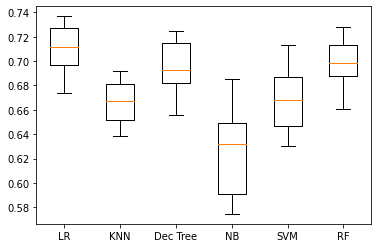

In [68]:
# boxplot algorithm comparison
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.savefig('fig2-6 Roberta.png')
plt.show()

In [69]:
results

[array([0.67362843, 0.70105985, 0.6973192 , 0.68765586, 0.72256858,
        0.72786783, 0.73682569, 0.69660118, 0.72404116, 0.72809479]),
 array([0.66396509, 0.63902743, 0.65554863, 0.63840399, 0.68204489,
        0.67830424, 0.6916121 , 0.65045214, 0.6707203 , 0.68631119]),
 array([0.65554863, 0.67518703, 0.68204489, 0.68173317, 0.7122818 ,
        0.72038653, 0.72435298, 0.6881821 , 0.696913  , 0.71593389]),
 array([0.57450125, 0.58572319, 0.5888404 , 0.59819202, 0.6355985 ,
        0.65149626, 0.65450577, 0.6289367 , 0.64078578, 0.68568756]),
 array([0.67144638, 0.62998753, 0.6355985 , 0.64339152, 0.6776808 ,
        0.69295511, 0.68974119, 0.65668849, 0.66417212, 0.71312753]),
 array([0.66053616, 0.68017456, 0.68859102, 0.68765586, 0.7122818 ,
        0.72163342, 0.72778297, 0.69130028, 0.70502027, 0.71343935])]

In [32]:
import xgboost as xgb
from sklearn.metrics import classification_report

model = xgb.XGBClassifier(objective='multi:softmax', num_class=2)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76      3475
           1       0.75      0.54      0.63      2941

    accuracy                           0.71      6416
   macro avg       0.72      0.70      0.69      6416
weighted avg       0.72      0.71      0.70      6416



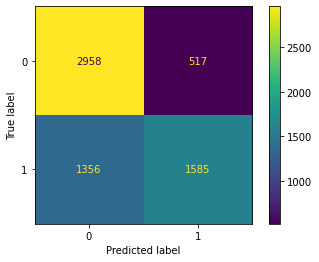

In [33]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

<AxesSubplot: >

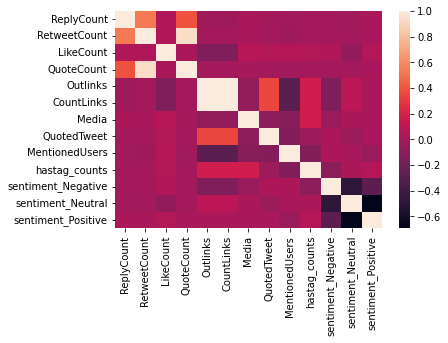

In [29]:
import seaborn as sns
corr = df_encoded.corr()
sns.heatmap(corr)